In [1]:
import jupyter_black

jupyter_black.load()

Other links:
1. [ISS Longeron Datasets](https://www.topcoder.com/thrive/articles/ISS%20Longeron%20-%20Datasets)
2. [Spectrolab XTJ Datasheet](https://www.spectrolab.com/photovoltaics/XTJ-Prime_Data_Sheet.pdf)

In [56]:
import numpy as np
from matplotlib import pyplot as plt
from shapely.geometry import Polygon
from solarcell import solarcell

<blockquote class="twitter-tweet"><p lang="en" dir="ltr">Roll-out deployment ✅<br><br>The sixth IROSA wing, developed in partnership with <a href="https://twitter.com/BoeingSpace?ref_src=twsrc%5Etfw">@BoeingSpace</a> + <a href="https://twitter.com/Spectrolab_Inc?ref_src=twsrc%5Etfw">@Spectrolab_Inc</a>, has completed deployment on <a href="https://twitter.com/Space_Station?ref_src=twsrc%5Etfw">@Space_Station</a>! <a href="https://t.co/rWgdYCYsGn">https://t.co/rWgdYCYsGn</a></p>&mdash; Redwire Space (@RedwireSpace) <a href="https://twitter.com/RedwireSpace/status/1669391470191865856?ref_src=twsrc%5Etfw">June 15, 2023</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

https://redwirespace.com/newsroom/redwires-roll-out-solar-array-technology-successfully-installed/

77


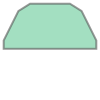

In [14]:
# compute the cell area of the iROSA Spectrolab XTJ cells
vertices = [
    (0.00, 0.00),
    (0.00, 1.25),
    (2.20, 5.65),
    (3.95, 6.75),
    (9.90, 6.75),
    (11.65, 5.65),
    (13.85, 1.25),
    (13.85, 0),
]  # vertices extracted from the datasheet picture!
polygon = Polygon(vertices)
print(area := int(polygon.area))
polygon

In [20]:
spectrolab_xtj = solarcell(
    isc=(0.018 * area, 10e-6 * area),
    voc=(2.72, -0.0056),
    imp=(0.0175 * area, 5e-6 * area),
    vmp=(2.406, -0.0063),
    t=28,
)  # parameters taken from the datasheet

In [68]:
ntot = 8 * 6 * 32 * 6  # total number of cells per iROSA
nseries = 8 * 12  # number of cells in series per string
assert not ntot % nseries  # check nseries divides ntot
size = (nseries, int(ntot / nseries))
size

(96, 96)

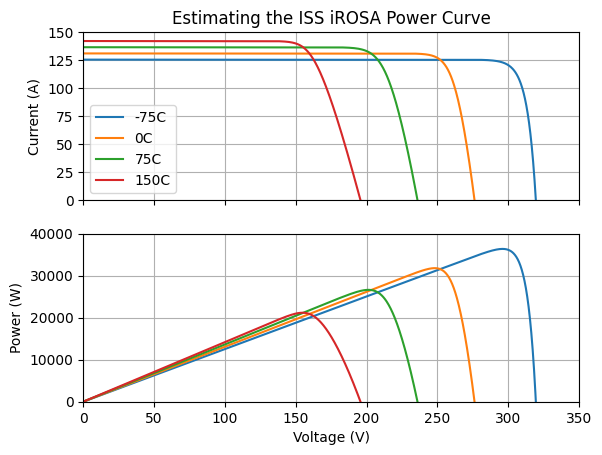

In [67]:
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True)

for temp in np.linspace(-75, 150, 4):
    t = np.full(size, temp)
    g = np.full(size, 1)
    array = spectrolab_xtj.array(t, g)
    v = np.linspace(0, array.voc, 1000)
    ax0.plot(v, array.iv(v), label="{:0.0f}C".format(temp))
    ax1.plot(v, array.pv(v))

ax0.set_xlim([0, 350]), ax1.set_xlabel("Voltage (V)")
ax0.set_ylim([0, 150]), ax0.set_ylabel("Current (A)")
ax1.set_ylim([0, 40000]), ax1.set_ylabel("Power (W)")
ax0.set_title("Estimating the ISS iROSA Power Curve")
ax0.grid(), ax1.grid()
_ = ax0.legend()

<blockquote class="twitter-tweet"><p lang="en" dir="ltr">Check out the new view on <a href="https://twitter.com/Space_Station?ref_src=twsrc%5Etfw">@Space_Station</a>!<a href="https://twitter.com/hashtag/ICYMI?src=hash&amp;ref_src=twsrc%5Etfw">#ICYMI</a>: The first of our iROSA solar arrays was successfully installed on space station at 11:24am ET this morning. At 63 feet long and 20 feet wide, they&#39;ll provide a significant power boost 🔋 to the orbiting laboratory! (📸: <a href="https://twitter.com/NASA?ref_src=twsrc%5Etfw">@NASA</a>) <a href="https://t.co/IFDAs8Az2G">pic.twitter.com/IFDAs8Az2G</a></p>&mdash; Redwire Space (@RedwireSpace) <a href="https://twitter.com/RedwireSpace/status/1406680770782109697?ref_src=twsrc%5Etfw">June 20, 2021</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

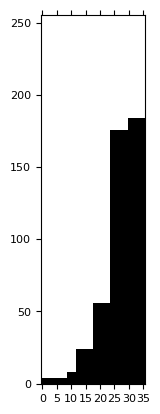

In [125]:
# TODO: recommend marking the cells on/off graphically and using their grid location to stack into an array

layout = np.zeros((32 * 8, 6 * 6))


def subgrid(x, y, shadow):
    assert shadow.shape == (8, 6)
    layout[x * 8 : (x + 1) * 8, y * 6 : (y + 1) * 6] = shadow


for r in range(23):
    subgrid(r, 5, np.ones((8, 6)))
for r in range(22):
    subgrid(r, 4, np.ones((8, 6)))
for r in range(7):
    subgrid(r, 3, np.ones((8, 6)))
for r in range(3):
    subgrid(r, 2, np.ones((8, 6)))

subgrid(0, 0, np.concatenate((np.ones((4, 6)), np.zeros((4, 6)))))
subgrid(
    0,
    1,
    np.concatenate(
        (np.ones((4, 6)), np.concatenate((np.zeros((4, 3)), np.ones((4, 3))), axis=1))
    ),
)

_ = plt.spy(layout, origin="lower", aspect=0.5)
plt.tick_params(labelsize=8)